In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-english'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

Me an my nigga attitude soooooo bad but he always cave first cus he kno I stand on business literally 😂🤣 1
@khawarkhatana @ashoswai look at you with your hatred and jealousy you little Islamophobic POS, millions of Hindus live in Muslim nations, Jews have lived in peace with Muslims historically, even today they are welcome in many Muslim and Arab countries, this is not about religion, we are the same… https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements You must!
I dug this one out at Christmas - it had been in my sewing bag untouched for years 0
@EstherMcVey1 We look forward to hearing their response (to whatever question they will imagine you asked) 0
This is so amazing.  I am impressed with this project, hopefully with this event the community and especially this coin will achieve success., https://t.co/wB5RQb0EYJ 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

me an my nigga attitude soooooo bad but he always cave first cus he kno i stand on business literally 😂🤣 1
khawarkhatana ashoswai look at you with your hatred and jealousy you little islamophobic pos millions of hindus live in muslim nations jews have lived in peace with muslims historically even today they are welcome in many muslim and arab countries this is not about religion we are the same… 1
dartwalker graniteelements you must i dug this one out at christmas it had been in my sewing bag untouched for years 0
esthermcvey1 we look forward to hearing their response to whatever question they will imagine you asked 0
this is so amazing i am impressed with this project hopefully with this event the community and especially this coin will achieve success 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 478/478 [03:08<00:00,  2.53it/s, loss=0.127] 


Train loss 0.14347883289344765 accuracy 0.9413486379541516
Validation loss 0.07270858893170953 accuracy 0.9722849014029236
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9722849014029236
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 478/478 [02:49<00:00,  2.82it/s, loss=0.088] 


Train loss 0.06809054633259586 accuracy 0.974688511723732
Validation loss 0.06625656123214867 accuracy 0.9756205238889434
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9756205238889434
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 478/478 [03:04<00:00,  2.59it/s, loss=0.0732] 


Train loss 0.054790744476145035 accuracy 0.979544785637202
Validation loss 0.06455694905598648 accuracy 0.9764544295104484
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9764544295104484
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 478/478 [03:01<00:00,  2.63it/s, loss=0.0758] 


Train loss 0.04635472614785742 accuracy 0.9832728342980477
Validation loss 0.06644241627654993 accuracy 0.9782203472971648
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.9782203472971648
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 478/478 [03:08<00:00,  2.54it/s, loss=0.0543]  


Train loss 0.041326515831878394 accuracy 0.9846790280911737
Validation loss 0.06416923072538339 accuracy 0.9773373884038066
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 478/478 [03:14<00:00,  2.46it/s, loss=0.0609]  


Train loss 0.037112805874975376 accuracy 0.9864449458778901
Validation loss 0.07435371701430996 accuracy 0.9768959089571275
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 478/478 [03:00<00:00,  2.65it/s, loss=0.0412] 


Train loss 0.03038477272824988 accuracy 0.9882599169364596
Validation loss 0.0658971860888414 accuracy 0.97890709310311
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.97890709310311
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 478/478 [02:51<00:00,  2.78it/s, loss=0.0234]  


Train loss 0.022315794954205003 accuracy 0.9912031132476536
Validation loss 0.09681949041987536 accuracy 0.9762091631511822
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 478/478 [02:59<00:00,  2.67it/s, loss=0.00826] 


Train loss 0.022221060352143978 accuracy 0.9915955394224795
Validation loss 0.09860021287822747 accuracy 0.9783184538408712
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 478/478 [02:50<00:00,  2.80it/s, loss=0.0179]  


Train loss 0.02027645490897496 accuracy 0.9921187743222474
Validation loss 0.08324874366589938 accuracy 0.9772883351319533
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 478/478 [02:50<00:00,  2.80it/s, loss=0.0135]  


Train loss 0.022080180625977757 accuracy 0.9917426992380393
Validation loss 0.09237330009491415 accuracy 0.9777788678504856
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 478/478 [02:50<00:00,  2.80it/s, loss=0.0157]  


Train loss 0.017043224250750177 accuracy 0.99347591484352
Validation loss 0.09262382282067846 accuracy 0.9781712940253116
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


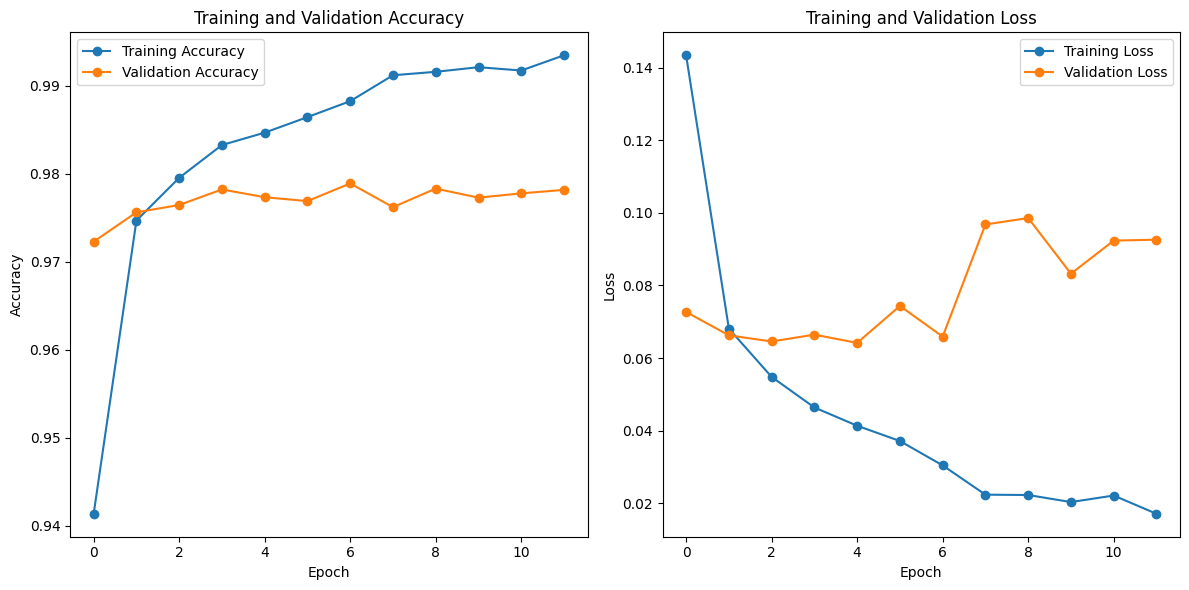

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.97768185608476 Test Loss: 0.06846079960669157


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.98      0.98     10120
        Hate       0.98      0.98      0.98     10267

    accuracy                           0.98     20387
   macro avg       0.98      0.98      0.98     20387
weighted avg       0.98      0.98      0.98     20387



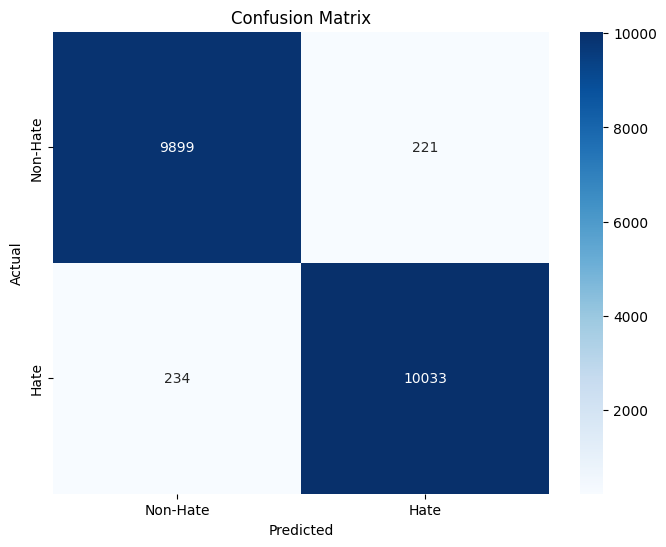

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.76
